In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [23]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [24]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [25]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-35.17998901124401 -119.12918410433252
-59.46170729715216 -53.15335595209133
-5.2836424512122875 141.536063319907
-14.866581927217865 31.310299970281108
56.82604350852603 -145.6251208521548
45.17254053654656 -38.76359960935622
-13.23922585108373 99.34058524272302
-70.1731284953544 68.55440493405595
-28.919997952195985 -8.050259768787413
-73.12206268673609 34.33668475619095
57.276482375076824 163.18562294931536
-26.404247740792734 21.135033530354633
25.234601151756237 -123.27352796748045
87.52257112095148 169.751818664989
-37.998394572377904 -142.86492032434685
-21.11844999923062 -141.3730572036984
40.75315510657427 -175.15469939163566
20.124665007524882 161.7224491172829
-20.49607535753435 62.68296649155229
50.94823167260421 158.71384514385068
-67.39536958736794 107.93713204052153
-1.9519355415432074 149.05733621897923
-24.327827637510808 96.50463639675604
-9.780796426826754 -42.619298188887
82.99929172612502 55.387373153774774
-62.75209807835295 152.02508051564706
-33.68252179869872 -

-72.63269816064812 113.02759944718565
44.93085669149431 120.71969699698354
-61.17364420192058 147.07085895339787
-35.05985496386205 -96.94153735656894
-13.371868144332424 -150.4459401775087
-54.758294806815854 150.7834978032143
-43.4844043119757 135.17607896438636
76.90889240105273 66.45063195357119
-4.649059460931198 111.98246658122707
52.71527785541801 102.65065112969296
-85.9690679323989 -102.51255337680853
89.16630238978291 -2.4101793177804325
-74.10284154816623 -123.83773205917493
53.54856585868288 72.33328486044488
-62.45285025088364 -45.586234895598494
9.627557423393085 -132.53630258872744
-23.238317562858086 -21.759555499204566
47.663717764711606 -97.88629372188092
58.36171159497141 91.21729160115655
-55.40919776945977 -173.88141350507124
70.4289620286435 44.08319419818096
51.58242225940484 -82.79587319432333
9.210518083434621 60.781933550300096
52.069665933156216 -127.81049010080947
-43.47390538425478 102.88065072665472
3.70559903586134 -14.094261501733797
-28.68366697129479 -

In [26]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
print(cities)

['rikitea', 'ushuaia', 'kiunga', 'nyimba', 'palmer', 'ribeira grande', 'labuhan', 'taolanaro', 'jamestown', 'port elizabeth', 'ust-kamchatsk', 'bokspits', 'san quintin', 'pevek', 'mataura', 'provideniya', 'butaritari', 'grand river south east', 'petropavlovsk-kamchatskiy', 'albany', 'lorengau', 'carnarvon', 'pilao arcado', 'belushya guba', 'hobart', 'aykhal', 'dinsor', 'villerupt', 'bredasdorp', 'poum', 'arraial do cabo', 'katsuura', 'hilo', 'bambous virieux', 'saint-philippe', 'klyavlino', 'ulaanbaatar', 'bluff', 'nampula', 'yaring', 'lac du bonnet', 'bilibino', 'victoria', 'new norfolk', 'sembakung', 'mahebourg', 'karatau', 'ostrovnoy', 'yangambi', 'nabire', 'chokurdakh', 'busselton', 'murgab', 'limbang', 'esperance', 'upernavik', 'longyearbyen', 'cape town', 'prince rupert', 'kodiak', 'lolua', 'ponta do sol', 'monrovia', 'price', 'mar del plata', 'lavrentiya', 'vaitupu', 'hobyo', 'muros', 'torbay', 'basoko', 'ulaangom', 'eldikan', 'flinders', 'hirado', 'mergui', 'tiksi', 'dikson', '

In [27]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [31]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 2 | rikitea
Processing Record 2 of Set 2 | ushuaia
Processing Record 3 of Set 2 | kiunga
Processing Record 4 of Set 2 | nyimba
Processing Record 5 of Set 2 | palmer
Processing Record 6 of Set 2 | ribeira grande
Processing Record 7 of Set 2 | labuhan
Processing Record 8 of Set 2 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 2 | jamestown
Processing Record 10 of Set 2 | port elizabeth
Processing Record 11 of Set 2 | ust-kamchatsk
City not found. Skipping...
Processing Record 12 of Set 2 | bokspits
City not found. Skipping...
Processing Record 13 of Set 2 | san quintin
Processing Record 14 of Set 2 | pevek
Processing Record 15 of Set 2 | mataura
Processing Record 16 of Set 2 | provideniya
Processing Record 17 of Set 2 | butaritari
Processing Record 18 of Set 2 | grand river south east
City not found. Skipping...
Processing Record 19 of Set 2 | petropavlovsk-kamchatskiy
Processing Record 20 of Set 2 | albany
Processing Record 21 of Set 2 | lo

Processing Record 35 of Set 5 | bandarbeyla
Processing Record 36 of Set 5 | naron
Processing Record 37 of Set 5 | saint-francois
Processing Record 38 of Set 5 | ternate
Processing Record 39 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 40 of Set 5 | saint-pierre
Processing Record 41 of Set 5 | kaitangata
Processing Record 42 of Set 5 | bethel
Processing Record 43 of Set 5 | souillac
Processing Record 44 of Set 5 | coihaique
Processing Record 45 of Set 5 | kysyl-syr
Processing Record 46 of Set 5 | tumaco
Processing Record 47 of Set 5 | guerrero negro
Processing Record 48 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 49 of Set 5 | narsaq
Processing Record 50 of Set 5 | tubuala
Processing Record 1 of Set 6 | namibe
Processing Record 2 of Set 6 | chicama
Processing Record 3 of Set 6 | porto santo
Processing Record 4 of Set 6 | andenes
Processing Record 5 of Set 6 | myingyan
Processing Record 6 of Set 6 | krasnaya gorka
Processing Record 7 of Set

Processing Record 25 of Set 9 | villafranca de los barros
Processing Record 26 of Set 9 | solnechnyy
Processing Record 27 of Set 9 | kazalinsk
City not found. Skipping...
Processing Record 28 of Set 9 | lima
Processing Record 29 of Set 9 | acapulco
Processing Record 30 of Set 9 | port hueneme
Processing Record 31 of Set 9 | clyde river
Processing Record 32 of Set 9 | channel-port aux basques
Processing Record 33 of Set 9 | nizhneyansk
City not found. Skipping...
Processing Record 34 of Set 9 | caluquembe
Processing Record 35 of Set 9 | pogar
Processing Record 36 of Set 9 | shu
Processing Record 37 of Set 9 | kibala
Processing Record 38 of Set 9 | mikhaylovka
Processing Record 39 of Set 9 | mahibadhoo
Processing Record 40 of Set 9 | lata
Processing Record 41 of Set 9 | richards bay
Processing Record 42 of Set 9 | zhezkazgan
Processing Record 43 of Set 9 | plettenberg bay
Processing Record 44 of Set 9 | roma
Processing Record 45 of Set 9 | almirante tamandare
Processing Record 46 of Set 

Processing Record 11 of Set 13 | bubaque
Processing Record 12 of Set 13 | nanortalik
Processing Record 13 of Set 13 | rawson
Processing Record 14 of Set 13 | ornskoldsvik
Processing Record 15 of Set 13 | macaboboni
City not found. Skipping...
Processing Record 16 of Set 13 | meulaboh
Processing Record 17 of Set 13 | praia da vitoria
Processing Record 18 of Set 13 | qui nhon
Processing Record 19 of Set 13 | yeppoon
Processing Record 20 of Set 13 | makakilo city
Processing Record 21 of Set 13 | dera din panah
City not found. Skipping...
Processing Record 22 of Set 13 | nedjo
Processing Record 23 of Set 13 | nishihara
Processing Record 24 of Set 13 | fort nelson
Processing Record 25 of Set 13 | kuching
Processing Record 26 of Set 13 | goderich
Processing Record 27 of Set 13 | chernyy yar
Processing Record 28 of Set 13 | vera cruz
Processing Record 29 of Set 13 | loa janan
Processing Record 30 of Set 13 | haradok
Processing Record 31 of Set 13 | rorvik
Processing Record 32 of Set 13 | nyur

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.76,73,62,5.64,PF,2022-05-24 15:54:19
1,Ushuaia,-54.8000,-68.3000,35.26,87,40,17.27,AR,2022-05-24 15:54:26
2,Kiunga,-6.1219,141.2906,73.80,99,98,2.30,PG,2022-05-24 15:58:28
3,Nyimba,-14.5566,30.8149,67.71,42,21,3.87,ZM,2022-05-24 15:58:28
4,Palmer,42.1584,-72.3287,68.65,47,97,1.99,US,2022-05-24 15:58:29
5,Ribeira Grande,38.5167,-28.7000,66.60,82,75,9.22,PT,2022-05-24 15:58:29
6,Labuhan,-6.8844,112.2051,79.95,87,73,9.55,ID,2022-05-24 15:58:29
7,Jamestown,42.0970,-79.2353,68.02,52,30,5.01,US,2022-05-24 15:57:06
8,Port Elizabeth,-33.9180,25.5701,67.10,77,0,19.57,ZA,2022-05-24 15:58:30
9,San Quintin,30.4833,-115.9500,62.20,70,76,5.10,MX,2022-05-24 15:58:31


In [33]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [34]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-05-24 15:54:19,-23.1203,-134.9692,75.76,73,62,5.64
1,Ushuaia,AR,2022-05-24 15:54:26,-54.8000,-68.3000,35.26,87,40,17.27
2,Kiunga,PG,2022-05-24 15:58:28,-6.1219,141.2906,73.80,99,98,2.30
3,Nyimba,ZM,2022-05-24 15:58:28,-14.5566,30.8149,67.71,42,21,3.87
4,Palmer,US,2022-05-24 15:58:29,42.1584,-72.3287,68.65,47,97,1.99
5,Ribeira Grande,PT,2022-05-24 15:58:29,38.5167,-28.7000,66.60,82,75,9.22
6,Labuhan,ID,2022-05-24 15:58:29,-6.8844,112.2051,79.95,87,73,9.55
7,Jamestown,US,2022-05-24 15:57:06,42.0970,-79.2353,68.02,52,30,5.01
8,Port Elizabeth,ZA,2022-05-24 15:58:30,-33.9180,25.5701,67.10,77,0,19.57
9,San Quintin,MX,2022-05-24 15:58:31,30.4833,-115.9500,62.20,70,76,5.10


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

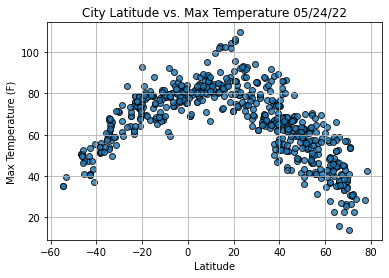

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()



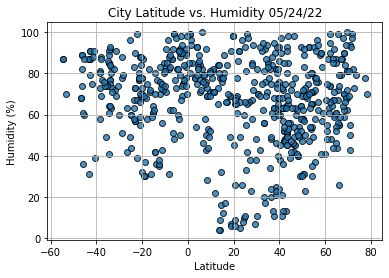

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

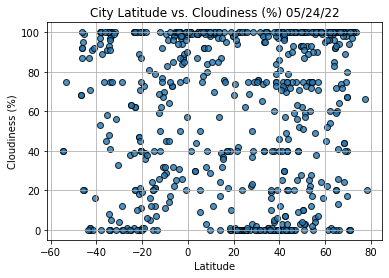

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

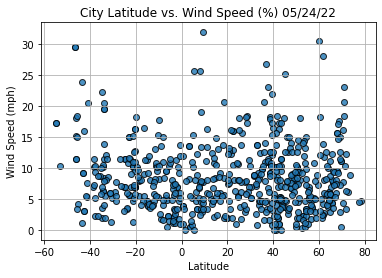

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (%) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [42]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
 
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
       # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Palmer,US,2022-05-24 15:58:29,42.1584,-72.3287,68.65,47,97,1.99
5,Ribeira Grande,PT,2022-05-24 15:58:29,38.5167,-28.7000,66.60,82,75,9.22
7,Jamestown,US,2022-05-24 15:57:06,42.0970,-79.2353,68.02,52,30,5.01
9,San Quintin,MX,2022-05-24 15:58:31,30.4833,-115.9500,62.20,70,76,5.10
10,Pevek,RU,2022-05-24 15:58:31,69.7008,170.3133,37.67,81,67,11.10


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

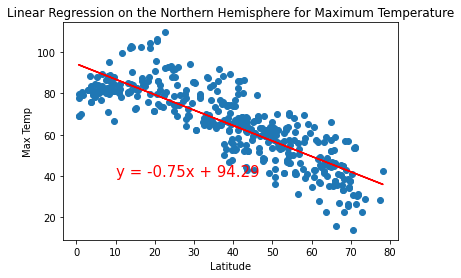

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

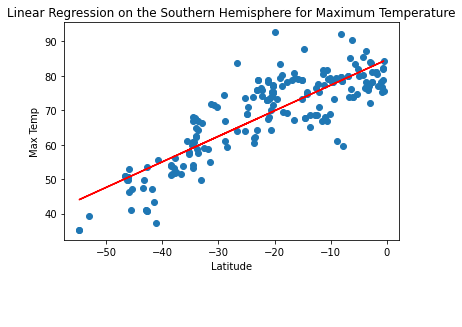

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,10))

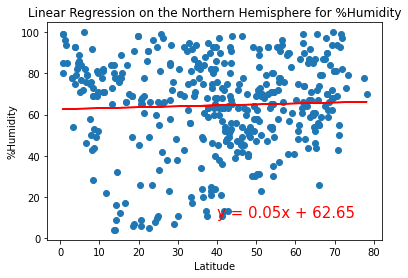

In [48]:
# Linear regression on the Northen Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for %Humidity', '%Humidity',(40,10))

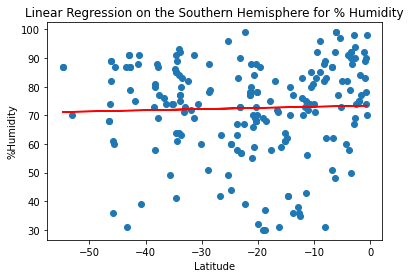

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '%Humidity',(-50,25))

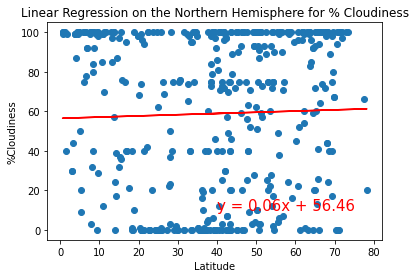

In [50]:
# Linear regression on the Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere for % Cloudiness" ,"%Cloudiness",(40,10))


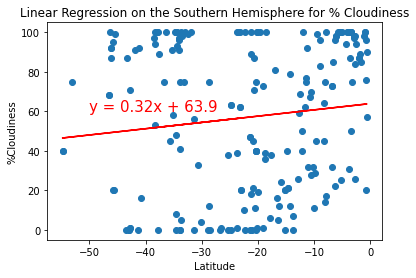

In [51]:
## Linear regression on the Southern Hemisphere

x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values,y_values,"Linear Regression on the Southern Hemisphere for % Cloudiness" ,"%Cloudiness",(-50,60))


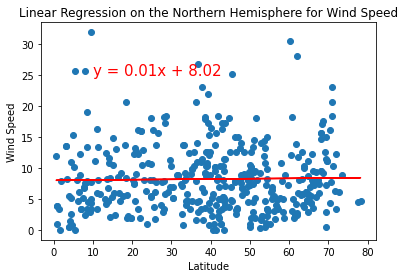

In [55]:
# Linear regression on the Northern Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere for Wind Speed" ,"Wind Speed",(10,25))


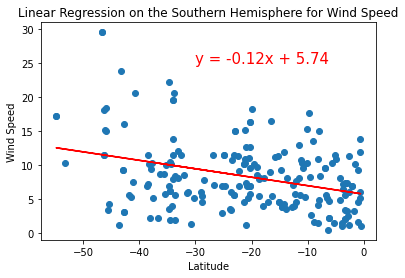

In [56]:
# Linear regression on the Southern Hemisphere
x_values= southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values,y_values,"Linear Regression on the Southern Hemisphere for Wind Speed" ,"Wind Speed",(-30,25))
